# Introduction

In [48]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
#extracting control and test data

data1 = pd.read_csv('C:/Data_Science/Personal_Notebooks/A-B_Testing/control_group.csv', sep=';', parse_dates=['Date'], dayfirst=True)
data2 = pd.read_csv('C:/Data_Science/Personal_Notebooks/A-B_Testing/test_group.csv', sep=';', parse_dates=['Date'], dayfirst=True)

control = data1.copy()
test = data2.copy()

print("First 3 rows of control data: \n", control.head(3))
print("First 3 rows of test data: \n", test.head(3))

First 3 rows of control data: 
       Campaign Name       Date  Spend [USD]  # of Impressions     Reach  \
0  Control Campaign 2019-08-01         2280           82702.0   56930.0   
1  Control Campaign 2019-08-02         1757          121040.0  102513.0   
2  Control Campaign 2019-08-03         2343          131711.0  110862.0   

   # of Website Clicks  # of Searches  # of View Content  # of Add to Cart  \
0               7016.0         2290.0             2159.0            1819.0   
1               8110.0         2033.0             1841.0            1219.0   
2               6508.0         1737.0             1549.0            1134.0   

   # of Purchase  
0          618.0  
1          511.0  
2          372.0  
First 3 rows of test data: 
    Campaign Name       Date  Spend [USD]  # of Impressions  Reach  \
0  Test Campaign 2019-08-01         3008             39550  35820   
1  Test Campaign 2019-08-02         2542            100719  91236   
2  Test Campaign 2019-08-03         2365  

In [50]:
control.isnull().sum(), test.isnull().sum()

(Campaign Name          0
 Date                   0
 Spend [USD]            0
 # of Impressions       1
 Reach                  1
 # of Website Clicks    1
 # of Searches          1
 # of View Content      1
 # of Add to Cart       1
 # of Purchase          1
 dtype: int64,
 Campaign Name          0
 Date                   0
 Spend [USD]            0
 # of Impressions       0
 Reach                  0
 # of Website Clicks    0
 # of Searches          0
 # of View Content      0
 # of Add to Cart       0
 # of Purchase          0
 dtype: int64)

In [51]:
#removing missing values

control = control.dropna()

control.isnull().sum()

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       0
Reach                  0
# of Website Clicks    0
# of Searches          0
# of View Content      0
# of Add to Cart       0
# of Purchase          0
dtype: int64

In [52]:
#function to clean coloumns names

def lower_case(data, cols=None):
    if cols== None:
        col = data.columns
    data.rename(columns={col : col.lower() for col in cols}, inplace= True)
    
    


In [53]:
lower_case(control, ['Campaign Name', 'Date', 'Spend [USD]', '# of Impressions', 'Reach', '# of Website Clicks', '# of Searches', '# of View Content', '# of Add to Cart', '# of Purchase'])
lower_case(test, ['Campaign Name', 'Date', 'Spend [USD]', '# of Impressions', 'Reach', '# of Website Clicks', '# of Searches', '# of View Content', '# of Add to Cart', '# of Purchase'])

In [54]:
control['group'] = "Control"
test['group'] = "Test"

df = pd.concat([control, test], ignore_index=True)

## EDA

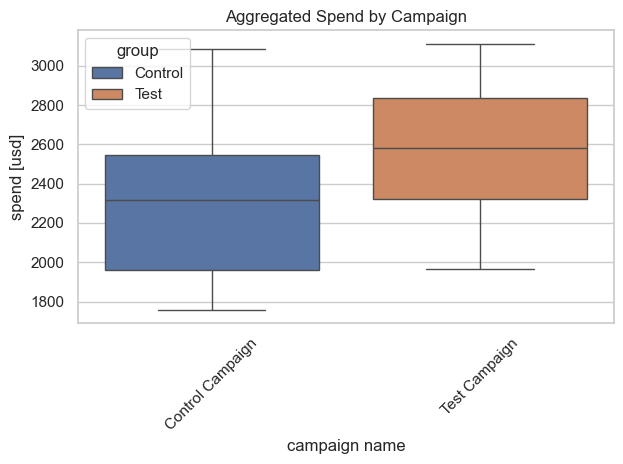

In [55]:
#box plot for avg spent

sns.set_theme(style="whitegrid")
sns.boxplot(x="campaign name", y="spend [usd]", hue="group", data=df)
plt.xticks(rotation=45)
plt.title("Aggregated Spend by Campaign")
plt.tight_layout()
plt.show()

### Findings spend [USD]

For the test campaign there was a higher amount of money spent.

We can carry on to determine whether the higher amount of money spent translates into higher convertion rate.

In [56]:
#aggregating

control_mean_spent = control.groupby('campaign name', as_index=False)['spend [usd]'].mean()
control_mean_spent["group"] = "Control"

test_mean_spent = test.groupby('campaign name', as_index=False)['spend [usd]'].mean()
test_mean_spent["group"] = "Test"

combined_df = pd.concat([control_mean_spent, test_mean_spent])

combined_df

,campaign name,spend [usd],group
0,Control Campaign,2304.068966,Control
0,Test Campaign,2563.066667,Test


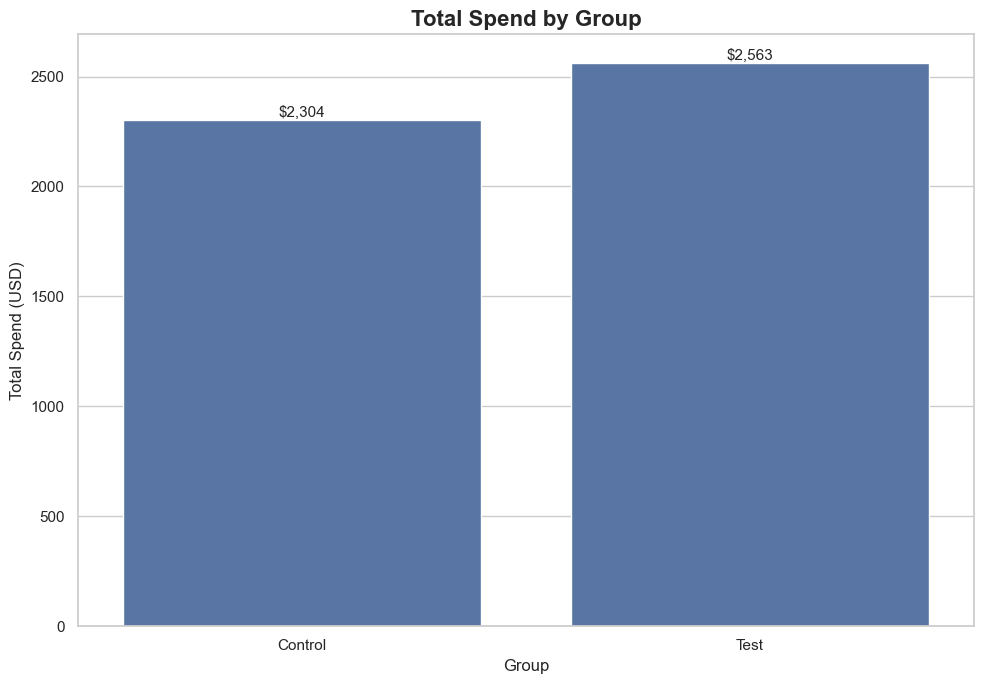

In [57]:
sns.set_theme(style="whitegrid")


plt.figure(figsize=(10, 7))
barplot = sns.barplot(
    x="group", 
    y="spend [usd]",
    data=combined_df,
    estimator="sum"
)

plt.title("Total Spend by Group", fontsize=16, fontweight='bold')
plt.xlabel("Group", fontsize=12)
plt.ylabel("Total Spend (USD)", fontsize=12)

for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f"${height:,.0f}", 
                     (p.get_x() + p.get_width() / 2, height),
                     ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

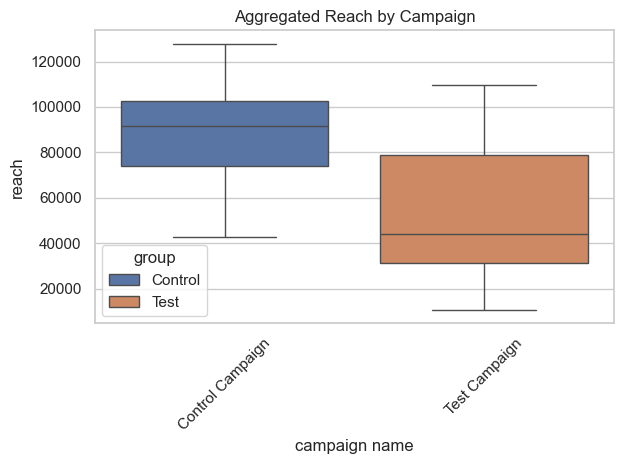

In [58]:
#box plot for avg spent

sns.set_theme(style="whitegrid")
sns.boxplot(x="campaign name", y="reach", hue="group", data=df)
plt.xticks(rotation=45)
plt.title("Aggregated Reach by Campaign")
plt.tight_layout()
plt.show()

In [59]:
control.columns

Index(['campaign name', 'date', 'spend [usd]', '# of impressions', 'reach',
       '# of website clicks', '# of searches', '# of view content',
       '# of add to cart', '# of purchase', 'group'],
      dtype='object')

In [60]:
#creating the convertion rate for both control and test

control['conversion_rate'] = control['# of purchase'] / control['reach']
test['conversion_rate'] = test['# of purchase'] / test['reach']

## Hypothesis testing

Null Hypothesis (H0): The test group has higher conversion rate than the control group.

Alternative Hypothesis(H1): The test group has lower conversion rate than the control group.

In [61]:
from scipy.stats import ttest_ind

control_rates = control['conversion_rate'].dropna()
test_rates = test['conversion_rate'].dropna()

In [62]:
#two sample ttest

t_stat, p_value = ttest_ind(test_rates, control_rates, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: 3.0805
P-value: 0.0042


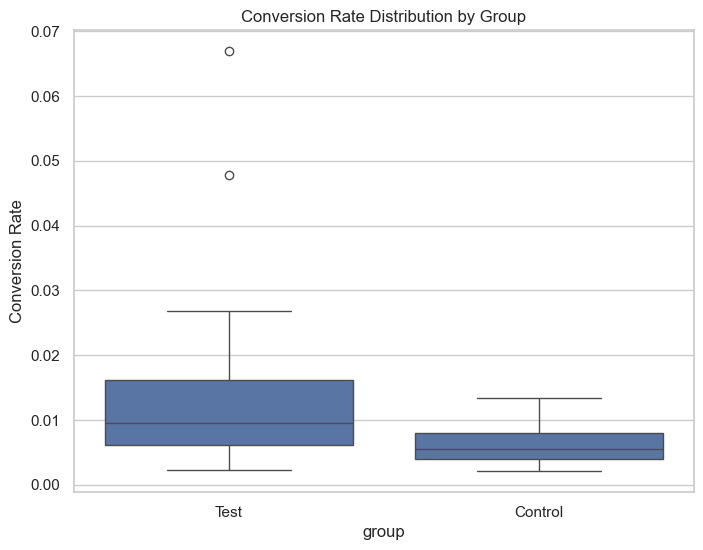

In [63]:
plot_df = pd.DataFrame({
    'conversion_rate': pd.concat([test_rates, control_rates], ignore_index=True),
    'group': ['Test'] * len(test_rates) + ['Control'] * len(control_rates)
})

sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(x='group', y='conversion_rate', data=plot_df)
plt.title('Conversion Rate Distribution by Group')
plt.ylabel('Conversion Rate')
plt.show()

### Results

Considering the results of the ttest we cannot reject the H0.

The test group has a higher convertion rate.

## Second hypothesis

Considering that the test group has higher convertion rate I also want to test if the ROI is higher for the test group considering that there was a higher amount spent for lower reach.

H0: The test group has a higher ROI than the control group

H1: The test group has a lower ROI than the control group

In [64]:
#assigning a value of 5 just as an assumption to test the ROI considering the value per convertion data is missing
control['value_per_conversion'] = 5
test['value_per_conversion'] = 5

control['conversions'] = control['reach'] * control['conversion_rate']
test['conversions'] = test['reach'] * test['conversion_rate']

control['revenue'] = control['value_per_conversion'] * control['conversions']
test['revenue'] = test['value_per_conversion'] * test['conversions']

control['ROI'] = ((control['revenue'] - control['spend [usd]']) / control['spend [usd]']) * 100
test['ROI'] = ((test['revenue'] - test['spend [usd]']) / test['spend [usd]']) * 100



In [65]:
control_rates = control['ROI'].dropna()
test_rates = test['ROI'].dropna()

In [66]:
#two sample ttest

t_stat, p_value = ttest_ind(test_rates, control_rates, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: -1.0904
P-value: 0.2801


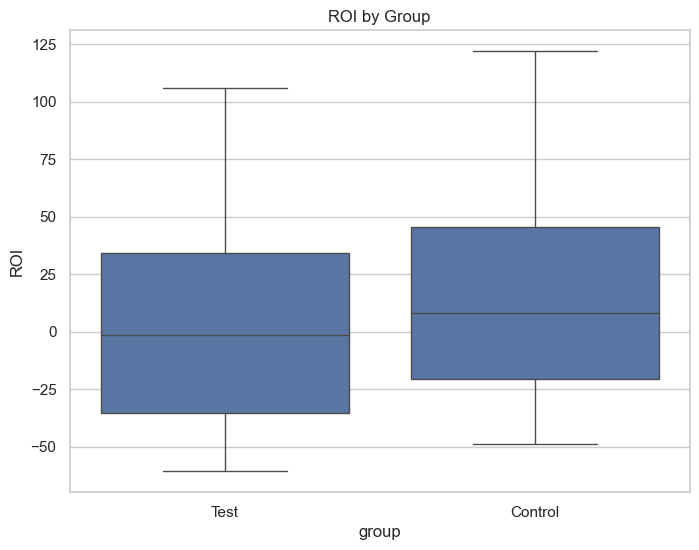

In [67]:
plot_df = pd.DataFrame({
    'ROI': pd.concat([test_rates, control_rates], ignore_index=True),
    'group': ['Test'] * len(test_rates) + ['Control'] * len(control_rates)
})

sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(x='group', y='ROI', data=plot_df)
plt.title('ROI by Group')
plt.ylabel('ROI')
plt.show()

In [68]:
roi_control = control['ROI'].mean()
test_control = test['ROI'].mean()

print(f"ROI for Control group: {roi_control}")
print(f"ROI for the Test group: {test_control}")

ROI for Control group: 16.020950704755567
ROI for the Test group: 3.2887344018699354
